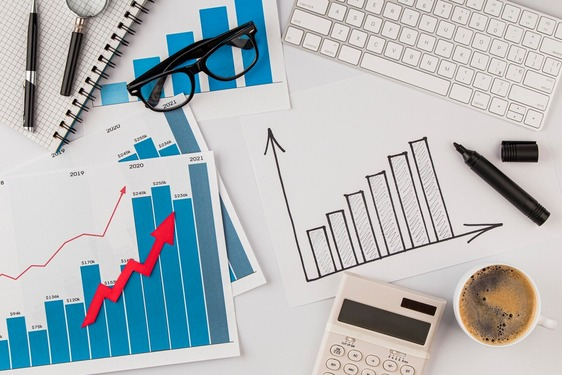

# SALES PREDICTION USING PYTHON

## Objectives:

1. Predict the sales with machine learning with python

## Import Libraries:

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Read datasets into dataframe
df=pd.read_csv('C:\\Users\\surface\\wqu\\Intership_Projects\\Advertising.csv')
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
# Drop unnecessary columns
df.drop(['Unnamed: 0' ],axis=1,inplace=True)
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [4]:
#Summary Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [5]:
# Inspect dataframe for null values
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
 df.isna().sum()/df.shape[0]*100

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

In [7]:
df.nunique()

TV           190
Radio        167
Newspaper    172
Sales        121
dtype: int64

C:\Users\surface\AppData\Local\Temp\ipykernel_1004\3909928055.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Sales"], color="r")


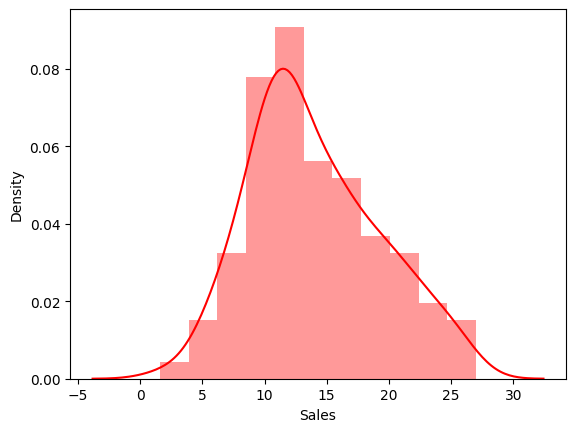

In [8]:
sns.distplot(df["Sales"], color="r")
plt.title="Purchase Distribution"
plt.show()

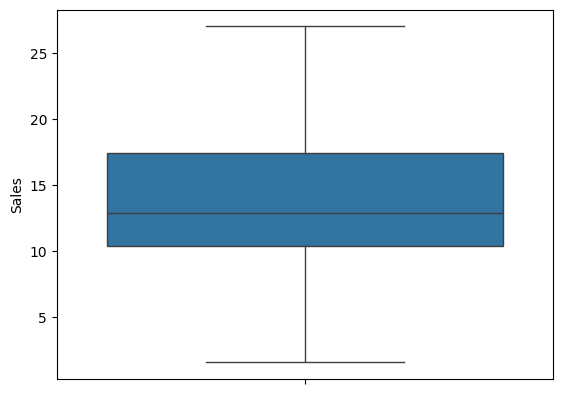

In [9]:
sns.boxplot(df["Sales"])
plt.title="Box plot of Purchase"
plt.show()

## Split Data

In [10]:
# Assign columns into target and vector
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [11]:
# Split data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
print(df.describe().columns)


Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


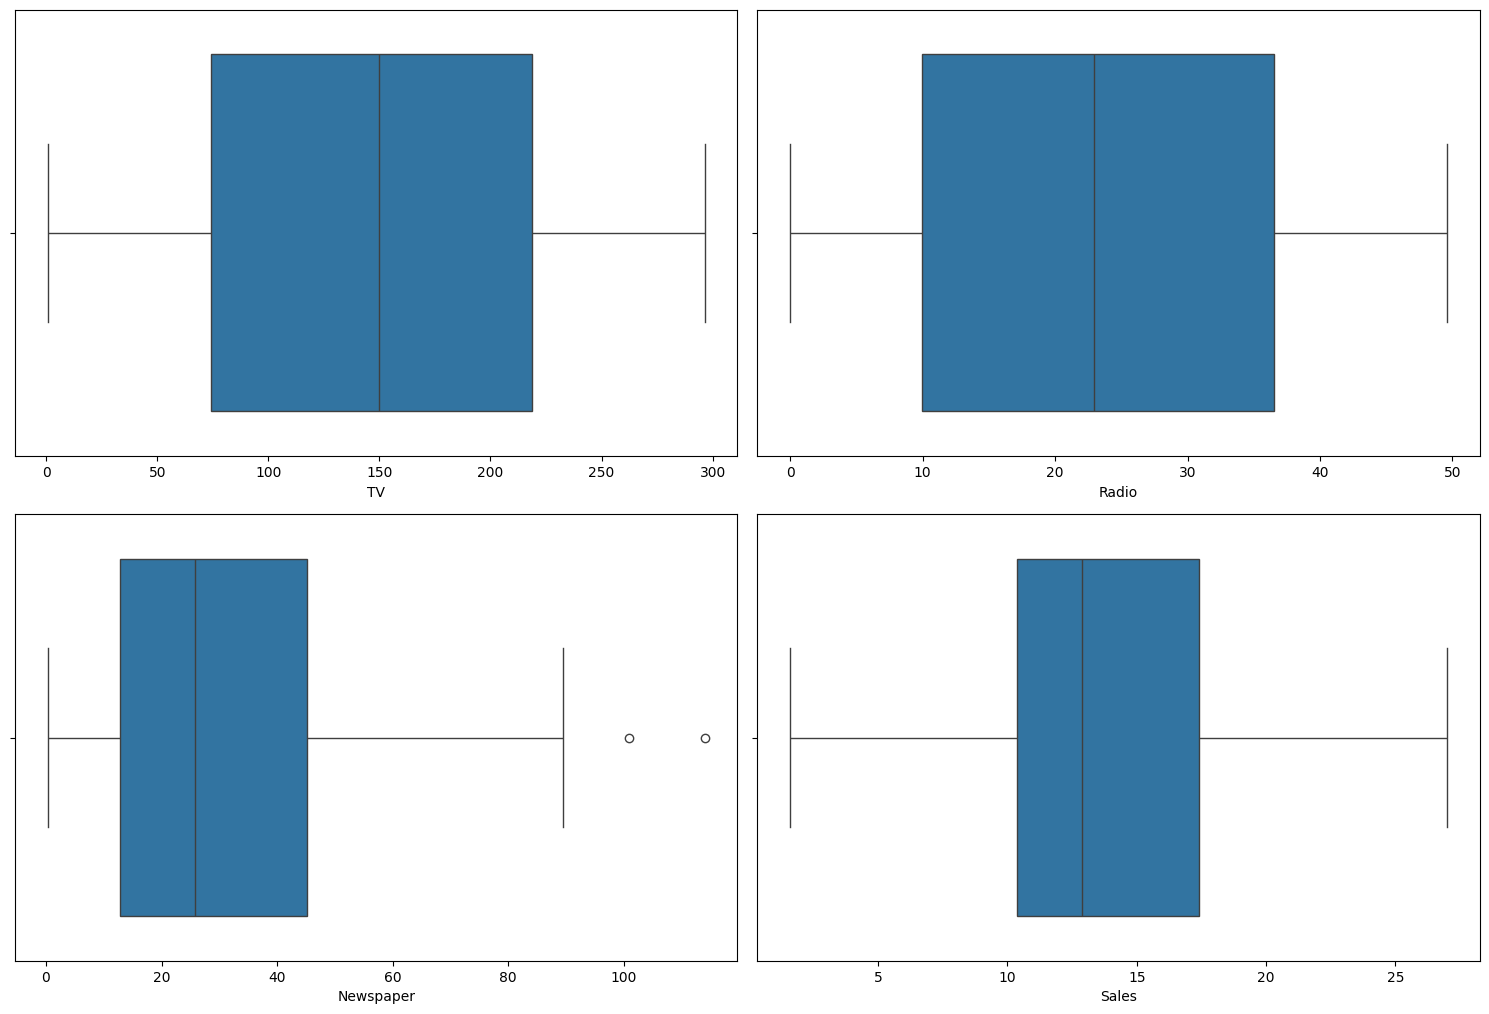

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
plt.figure(figsize=(15, 30))
x = 1
for col in df.describe().columns:
    plt.subplot(6, 2, x)
    sns.boxplot(x=df[col], orient='h')
    #plt.title(col)  # Ensure plt.title is not overwritten
    x += 1
plt.tight_layout()
plt.show()


In [23]:
def calculate_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR
    outliers = [i for i in data if i < lower_threshold or i > upper_threshold]
    print(f'Outliers detected by the IQR method: {outliers}')


In [26]:
calculate_iqr(df['Newspaper'])


Outliers detected by the IQR method: [114.0, 100.9]


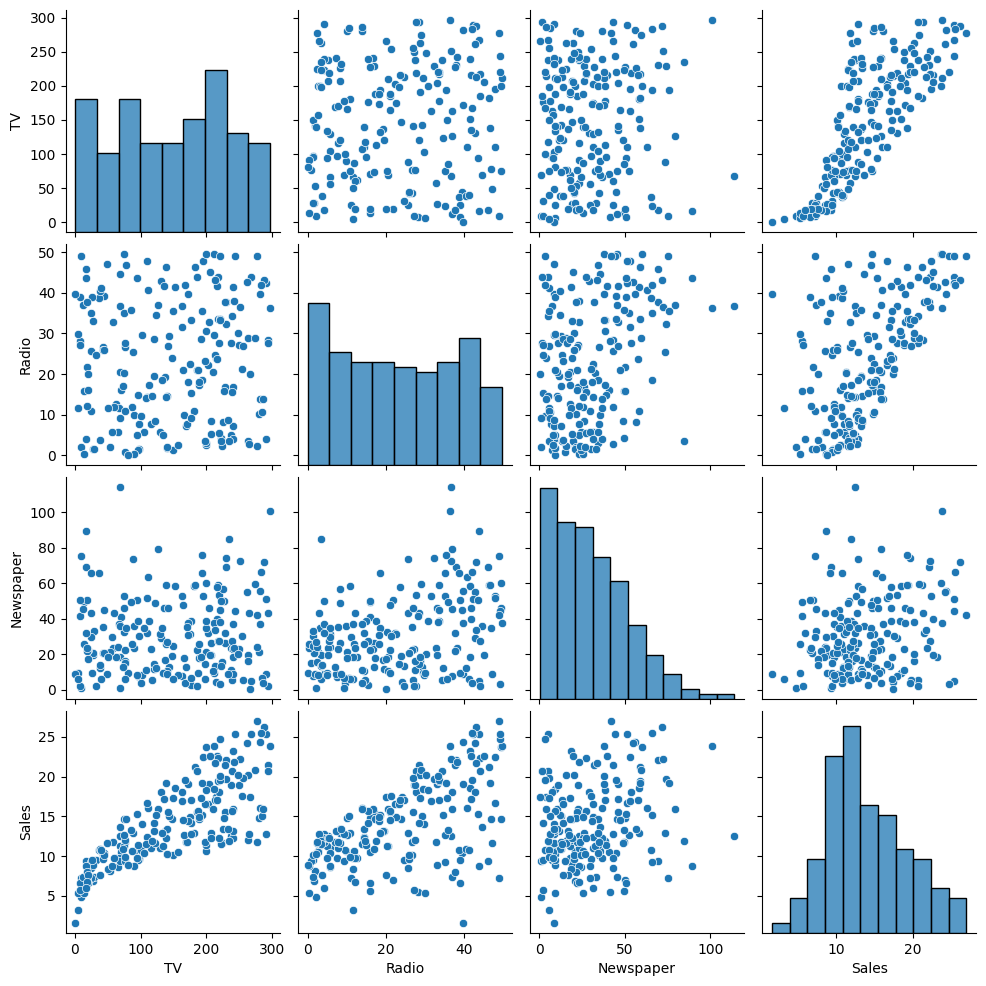

In [25]:
sns.pairplot(df)
plt.show()

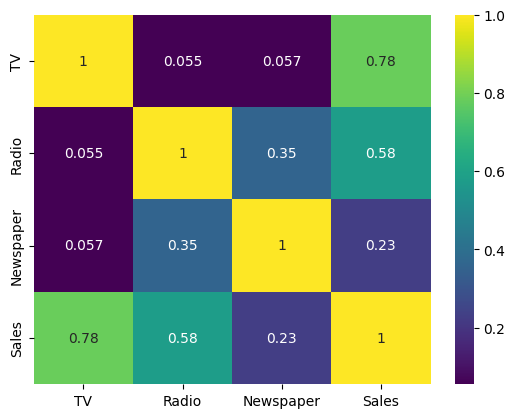

In [27]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='viridis')
plt.show()

In [28]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred_linear = linear_model.predict(X_test)

In [30]:
mse_inear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print(f'Linear Regression MSE : {mse_inear}')
print(f'Linear Regression R^2 : {r2_linear}')

Linear Regression MSE : 3.174097353976107
Linear Regression R^2 : 0.8994380241009119


In [31]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [32]:
y_pred_rf = rf_model.predict(X_test)

In [33]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest MSE: {mse_rf}')
print(f'Random Forest R^2: {r2_rf}')

Random Forest MSE: 0.5910253749999989
Random Forest R^2: 0.9812750924472915


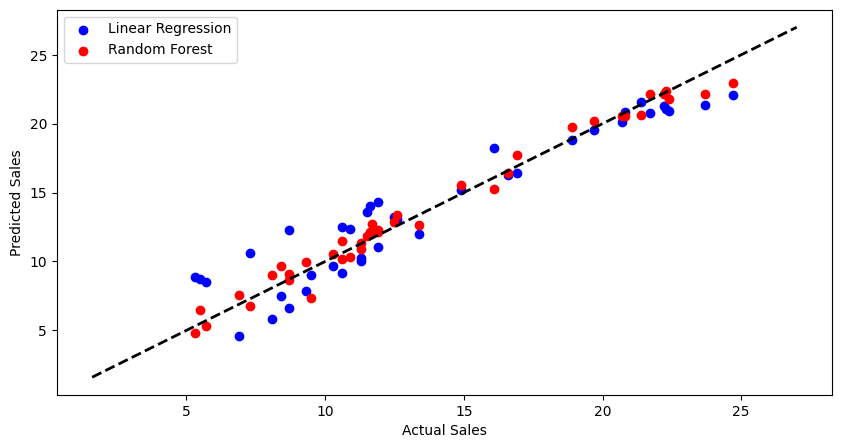

In [34]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred_linear, color='blue', label='Linear Regression')
plt.scatter(y_test, y_pred_rf, color='red', label='Random Forest')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.legend()
#plt.title('Actual vs Predicted Sales')
plt.show()

In [35]:
new_data = pd.DataFrame({
    'TV': [300], 
    'Radio': [150], 
    'Newspaper': [50]
})

In [36]:
new_data_scaled = scaler.transform(new_data)

In [37]:
sales_prediction = rf_model.predict(new_data_scaled)
print(f'Predicted Sales: {sales_prediction[0]}')

Predicted Sales: 26.058000000000025
